[Airbnb](https://www.airbnb.com/a/?af=43720035&c=.pi0.pk25650614176_308605552029_c_12026464216&sem_position=1t1&sem_target=kwd-12026464216&location_of_interest=&location_physical=9003566&ghost=true&gclid=CjwKCAjwnrjrBRAMEiwAXsCc457x4tEYXmnyq0dHqOnQKFupepnawnEhBV-VFrCi8rkSyYXHKX9RHBoC2aYQAvD_BwE) is a marketplace for short term rentals that allows you to list part or all of your living space for others to rent. You can rent everything from a room in an apartment to your entire house on AirBnB. Because most of the listings are on a short-term basis, AirBnB has grown to become a popular alternative to hotels. The company itself has grown from it's founding in 2008 to a 30 billion dollar valuation in 2016 and is currently worth more than any hotel chain in the world.

One challenge that hosts looking to rent their living space face is determining the optimal nightly rent price. In many areas, renters are presented with a good selection of listings and can filter on criteria like price, number of bedrooms, room type and more. Since AirBnB is a marketplace, the amount a host can charge on a nightly basis is closely linked to the dynamics of the marketplace.

As a host, if we try to charge above market price for a living space we'd like to rent, then renters will select more affordable alternatives which are similar to ours. If we set our nightly rent price too low, we'll miss out on potential revenue.

One strategy we could use is to:

* Find a few listings that are similar to ours,
* Average the listed price for the ones most similar to ours,
* Set our listing price to this calculated average price.

The link to dataset we will be using is [here](C:\Users\miself\Desktop\my_dataset\Airbnb)

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
df = pd.read_csv('listings.csv')

In [93]:
airbnb = df[['host_response_rate','host_acceptance_rate','host_listings_count','latitude','longitude','city','zipcode','state','accommodates','room_type','bedrooms','bathrooms','beds','price','cleaning_fee','security_deposit','minimum_nights','maximum_nights','number_of_reviews']]

For our purpose we are going to keep only those rows that are useful for our analysis.

In [94]:
airbnb.head()

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,city,zipcode,state,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews
0,92%,91%,26,38.890046,-77.002808,Washington,20003,DC,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0
1,90%,100%,1,38.880413,-76.990485,Washington,20003,DC,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65
2,90%,100%,2,38.955291,-76.986006,Hyattsville,20782,MD,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1
3,100%,NaN,1,38.872134,-77.019639,Washington,20024,DC,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0
4,92%,67%,1,38.996382,-77.041541,Silver Spring,20910,MD,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0


In [95]:
np.random.seed(1)
#Randomize order of row in df
shuffled_ind = np.random.permutation(airbnb.index)
airbnb = airbnb.reindex(shuffled_ind)

#Sorting values according to accommodation
airbnb.sort_values('accommodates')

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,city,zipcode,state,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews
1512,96%,84%,1,38.882230,-77.013574,Washington,20024,DC,1,Private room,1.0,1.0,1.0,$65.00,NaN,NaN,1,1125,5
1587,NaN,NaN,1,38.959880,-77.036224,Washington,20011,DC,1,Private room,1.0,1.0,1.0,$100.00,NaN,NaN,1,5,1
1936,100%,100%,4,38.860855,-76.988145,Washington,20020,DC,1,Private room,1.0,1.0,1.0,$45.00,NaN,$95.00,3,360,24
1991,96%,79%,2,38.895321,-76.997368,Washington,20002,DC,1,Private room,1.0,1.0,1.0,$90.00,NaN,$95.00,1,2,22
1695,85%,79%,19,38.937408,-77.024876,Washington,20010,DC,1,Private room,1.0,3.0,1.0,$40.00,$15.00,NaN,4,360,5
2535,NaN,NaN,1,38.924448,-77.001895,Washington,20002,DC,1,Entire home/apt,1.0,1.0,1.0,$275.00,NaN,NaN,2,2,0
3366,91%,78%,3,38.925439,-77.052656,Washington,20008,DC,1,Private room,1.0,1.0,1.0,$70.00,NaN,$150.00,1,1125,3
261,100%,100%,2,38.904733,-77.016380,Washington,20001,DC,1,Entire home/apt,1.0,1.0,1.0,$99.00,$45.00,$200.00,4,365,54
2381,90%,67%,4,38.917736,-77.046546,Washington,20009,DC,1,Private room,1.0,1.0,1.0,$159.00,$15.00,NaN,1,1125,1
2269,NaN,NaN,1,38.925747,-77.041107,Washington,20009,DC,1,Private room,1.0,1.0,1.0,$140.00,NaN,NaN,1,1125,0


In [96]:
airbnb.isnull().sum()

host_response_rate       434
host_acceptance_rate     614
host_listings_count        0
latitude                   0
longitude                  0
city                       0
zipcode                    9
state                      0
accommodates               0
room_type                  0
bedrooms                  21
bathrooms                 27
beds                      11
price                      0
cleaning_fee            1388
security_deposit        2297
minimum_nights             0
maximum_nights             0
number_of_reviews          0
dtype: int64

In [97]:
#Cleaning Price column
airbnb['price'] = airbnb['price'].str.replace(',','').str.replace('$','').astype(float)

In [98]:
airbnb['price'].mean()

149.16599516518937

In [99]:
airbnb.isnull().sum()

host_response_rate       434
host_acceptance_rate     614
host_listings_count        0
latitude                   0
longitude                  0
city                       0
zipcode                    9
state                      0
accommodates               0
room_type                  0
bedrooms                  21
bathrooms                 27
beds                      11
price                      0
cleaning_fee            1388
security_deposit        2297
minimum_nights             0
maximum_nights             0
number_of_reviews          0
dtype: int64

These valuses doesn't make sense for analyzing our data, so we are going to remove these columns.
* room_type,states are non-mumerical values
* latitude, longitude, zipcode are random values
* host_response_rate, host_acceptance_rate, host_listings_count has nothing to do with accomodation


In [100]:
airbnb = airbnb.drop(['host_response_rate', 'host_acceptance_rate', 'host_listings_count','room_type', 'latitude', 'longitude', 'city', 'zipcode',
       'state'],axis = 1)

There are too many values in cleaning_fee and security_deposit that are missing and its impossible to clean them, so we will remove them as well.

In [101]:
airbnb = airbnb.drop(['cleaning_fee', 'security_deposit'], axis = 1)

Now we are going to drop all the rows with missing values.

In [102]:
airbnb = airbnb.dropna()

In [103]:
airbnb.isnull().sum()

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

In [104]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = airbnb['price']
num_airbnb = (airbnb - airbnb.mean())/ (airbnb.std())
num_airbnb['price'] = price_col

In [105]:
n_airbnb = num_airbnb.copy()
n_airbnb.head()


,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1593,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
3091,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505
420,-0.596544,-0.249467,-0.439151,-0.546858,209.0,0.487635,-0.016584,-0.448301
808,4.393004,4.507903,1.264998,2.829956,215.0,-0.065038,-0.016553,0.646219


In [106]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Predicting Model

In [107]:
knn = KNeighborsRegressor(n_neighbors = 5, algorithm ='brute')
train_df = n_airbnb.iloc[0:2792]
test_df = n_airbnb.iloc[2792:]

train_features = train_df[['accommodates','bathrooms']]
train_target = train_df['price']

knn.fit(train_features, train_target)
predictions = knn.predict(test_df[['accommodates','bathrooms']])
mse = mean_squared_error(test_df['price'], predictions)
rmse = np.sqrt(mse)
rmse

125.14151170662127

## Tuning models for different k values

In [108]:
k_values = list(range(1,21))
mse_values = []
for val in k_values:
    knn = KNeighborsRegressor(n_neighbors = val,algorithm= 'brute')
    knn.fit(train_df[['accommodates','bedrooms','bathrooms','number_of_reviews']], train_df['price'])
    prediction = knn.predict(test_df[['accommodates','bedrooms','bathrooms','number_of_reviews']])
    mse = mean_squared_error(test_df['price'], prediction)
    mse_values.append(mse)

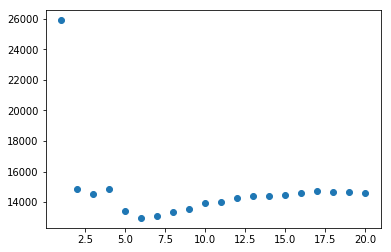

In [109]:
plt.scatter(k_values, mse_values)

From the above graph it can be seen that k value of 6 gives us the minimum mse.

# Multivariate Model

In [114]:
def knn_train_test(feature, target, df):
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row =  int(len(rand_df)/2)
    
    train_df = rand_df[0:last_train_row]
    test_df = rand_df[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmse = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors= k)
        knn.fit(train_df[[feature]], train_df[target])
        predict = knn.predict(test_df[[feature]])
    
        mse = mean_squared_error(test_df[target], predict)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse

k_rmse_result = {}
features_col = n_airbnb.columns.drop('price')

for col in features_cols:
    rmse_val = knn_train_test(col,'price', n_airbnb)
    k_rmse_result[col] = rmse_val

In [115]:
k_rmse_result

{'accommodates': {1: 163.08280439495948,
  3: 128.90648028100145,
  5: 129.77025945744046,
  7: 125.30984008611999,
  9: 123.44338368566332},
 'bedrooms': {1: 114.91902046056849,
  3: 118.56205380626477,
  5: 115.70325314644798,
  7: 115.36004232243823,
  9: 115.75660123717341},
 'bathrooms': {1: 161.93719027688246,
  3: 129.0604077185349,
  5: 140.29394747937775,
  7: 128.78784945992322,
  9: 123.90228072468268},
 'beds': {1: 146.75062399424925,
  3: 145.456751669177,
  5: 142.9220800247662,
  7: 142.9492547343461,
  9: 140.7831842223677},
 'minimum_nights': {1: 160.62311942050786,
  3: 154.14998339532661,
  5: 153.6748458118443,
  7: 155.13027175906697,
  9: 153.5314034791338},
 'maximum_nights': {1: 144.29687912293437,
  3: 142.36901699711993,
  5: 130.3822481467791,
  7: 122.84502786624982,
  9: 121.6340773750537},
 'number_of_reviews': {1: 146.81123482562214,
  3: 141.32330939295815,
  5: 128.6844234081449,
  7: 126.19214059998487,
  9: 125.38899552607116}}

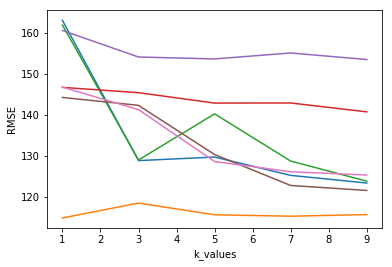

In [126]:
for k, v in k_rmse_result.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k_values')
    plt.ylabel('RMSE')

In [139]:
features_avg_rmse = {}
for k,v in k_rmse_result.items():
    avg_rmse = (np.mean(list(v.values())))
    features_avg_rmse[k] = avg_rmse
    
series_avg_rmse = pd.Series(features_avg_rmse) 
series_avg_rmse.sort_values()

bedrooms             116.060194
maximum_nights       132.305450
number_of_reviews    133.680021
accommodates         134.102554
bathrooms            136.796335
beds                 143.772379
minimum_nights       155.421925
dtype: float64

# Multivariate Model

In [150]:
def knn_train_test(feature, target, df):
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_col = int(len(rand_df)/2) 
    
    train_df = rand_df[0:last_train_col]
    test_df = rand_df[last_train_col:]
    
    knn = KNeighborsRegressor()
    
    knn.fit(train_df[feature], train_df[target])
    
    predict = knn.predict(test_df[feature])
    
    mse = mean_squared_error(test_df[target], predict)
    rmse = np.sqrt(mse)
    
    return rmse

rmse_results = {}

two_best_features = ['bedrooms','maximum_nights']
rmse = knn_train_test(two_best_features, 'price', n_airbnb)
rmse_results['two_best_features'] = rmse


three_best_features = ['bedrooms','maximum_nights','number_of_reviews']
rmse = knn_train_test(three_best_features,'price',n_airbnb)
rmse_results['three_best_features'] = rmse

four_best_features = ['bedrooms','maximum_nights','number_of_reviews', 'accommodates']
rmse = knn_train_test(four_best_features, 'price', n_airbnb)
rmse_results['four_best_features'] = rmse

five_best_features = ['bedrooms','maximum_nights','number_of_reviews', 'accommodates','bathrooms']
rmse = knn_train_test(five_best_features, 'price', n_airbnb)
rmse_results['five_best_features'] = rmse

rmse_results

{'two_best_features': 126.20412590060404,
 'three_best_features': 124.56946028513508,
 'four_best_features': 115.20340787140451,
 'five_best_features': 103.44685899613181}

In [154]:
def knn_train_test(feature, target, df):
    #Ramdomizing the index
    shuffled_df = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_df)
    
    #Dividing number of rows in two half
    last_train_col = int(len(rand_df)/2)
    
    #Splitting data into train and
    train_df = rand_df[0:last_train_col]
    test_df = rand_df[last_train_col:]
    
    K_values = list(range(1,25))
    k_rmse = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors= k)
        knn.fit(train_df[feature], train_df[target])
        predict = knn.predict(test_df[feature])
        mse = mean_squared_error(test_df[target],predict)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse
    
k_rmse_results = {}    
    
three_best_features = ['bedrooms','maximum_nights','number_of_reviews']
rmse = knn_train_test(three_best_features,'price',n_airbnb)
k_rmse_results['three_best_features'] = rmse

four_best_features = ['bedrooms','maximum_nights','number_of_reviews', 'accommodates']
rmse = knn_train_test(four_best_features, 'price', n_airbnb)
k_rmse_results['four_best_features'] = rmse

five_best_features = ['bedrooms','maximum_nights','number_of_reviews', 'accommodates','bathrooms']
rmse = knn_train_test(five_best_features, 'price', n_airbnb)
k_rmse_results['five_best_features'] = rmse
        
k_rmse_results        
    

{'three_best_features': {1: 142.5216185871669,
  2: 121.69958481176145,
  3: 118.72345962125432,
  4: 115.39008905076636,
  5: 115.07434936749779,
  6: 115.29306405723057,
  7: 115.87797985734676,
  8: 115.96906604057152,
  9: 113.44961633646922,
  10: 113.99579197599924,
  11: 113.83274558053138,
  12: 113.37227003329792,
  13: 113.53357657489575,
  14: 113.94684592012509,
  15: 114.56216538876215,
  16: 114.49931484985366,
  17: 115.151428658263,
  18: 115.17818331065403,
  19: 115.37724927789411,
  20: 115.40745860604642},
 'four_best_features': {1: 177.77489989500694,
  2: 126.67317933463697,
  3: 116.87561949914587,
  4: 109.81837212882981,
  5: 110.0021391156635,
  6: 106.17761428491421,
  7: 103.80516741902078,
  8: 105.65199834466517,
  9: 103.93658243072761,
  10: 102.98319175100566,
  11: 102.75654772623487,
  12: 103.03361366032851,
  13: 102.91586061470136,
  14: 101.36499398664944,
  15: 100.3631010158094,
  16: 100.09570916244193,
  17: 99.97856128227946,
  18: 100.355562

Now Using KFold to analyse our data.

In [166]:
from sklearn.model_selection import KFold, cross_val_score
num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    kf = KFold(fold,shuffle = True, random_state= 1)
    knn = KNeighborsRegressor()
    mse = cross_val_score(knn, n_airbnb[['accommodates']], n_airbnb['price'], cv = kf, scoring= 'neg_mean_squared_error')
    rmse = np.sqrt(np.abs(mse))
    avg_rmse = np.mean(rmse)
    avg_std =  np.std(rmse)
    print(str(fold), 'folds:', "avg_rmse:", str(avg_rmse), "avg_std:", str(avg_std))

3 folds: avg_rmse: 123.03661165292401 avg_std: 4.086342311837747
5 folds: avg_rmse: 128.64970769847167 avg_std: 16.802184176229613
7 folds: avg_rmse: 127.97513377042846 avg_std: 20.49543527053172
9 folds: avg_rmse: 123.61872669423639 avg_std: 24.383915795024848
10 folds: avg_rmse: 127.14768452083968 avg_std: 24.12971080464867
11 folds: avg_rmse: 127.6162429896584 avg_std: 29.36740885935232
13 folds: avg_rmse: 122.74835655496307 avg_std: 32.37835226566323
15 folds: avg_rmse: 122.75764540123978 avg_std: 32.89326016096263
17 folds: avg_rmse: 123.00505315300288 avg_std: 35.48871237937227
19 folds: avg_rmse: 122.14821235192935 avg_std: 35.17365639938169
21 folds: avg_rmse: 121.10942246881532 avg_std: 37.115747446720576
23 folds: avg_rmse: 124.93985894775318 avg_std: 39.278718711279566


As it can be seen 3 folds gives us the lowest avg rmse and avg std deviation.